1. Розробити засоби для облiку вiдпуску лiкiв пацiєнтам в аптецi на основi рецептiв вiд лiкарiв.
Рецепт характеризується iдентифiкацiйними номерами пацiєнта, лiкаря та лiкарського препарату.
Лiки характеризується iдентифiкацiйним номером, назвою, дозою i цiною. Для неповнолiтнiх пацiєнтiв (до 18 рокiв) надається знижка k%.
Лiкар характеризується iдентифiкацiйним номером i прiзвищем.
Пацiєнт характеризується iдентифiкацiйним номером, прiзвищем i датою народження.
Про кожну операцiю з вiдпуску лiкiв робиться облiковий запис у форматi == номер операцiї ==
дата == iдентифiкацiйний номер рецепта == кiлькiсть одиниць препарату.
Iнформацiя про лiкарiв, пацiєнтiв, лiкiв та облiковi операцiї подана окремими csv-файлами.

2. Отримати:
(а) табличку, в якiй для кожного пацiєнта ( вказати його прiзвище) пораховано сумарну вартiсть
лiкiв; ворядкувати за вартiстю лiкiв
(б) дiаграму до попереднього пункту
(в) щоденний вiдпуск кожного препарату за перiод часу, заданий вiджетами.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import unittest

### Types:

In [2]:
class Receipe:
    def __init__(self,id_receipe,id_patient,id_doctor,id_medicine):
        self.__id_receipe = id_receipe
        self.__id_patient = id_patient
        self.__id_doctor = id_doctor
        self.__id_medicine = id_medicine

    def __repr__(self):
        return f"Receipe({self.id_receipe},{self.id_patient},{self.id_doctor},{self.id_medicine})"
    
    @property
    def id_receipe(self):
        return self.__id_receipe
    @id_receipe.setter
    def id_receipe(self, id_receipe):
        self.__id_receipe = id_receipe

    @property
    def id_patient(self):
        return self.__id_patient
    @id_patient.setter
    def id_patient(self, id_patient):
        self.__id_patient = id_patient

    @property
    def id_doctor(self):
        return self.__id_doctor
    @id_doctor.setter
    def id_doctor(self, id_doctor):
        self.__id_doctor = id_doctor

    @property
    def id_medicine(self):
        return self.__id_medicine
    @id_medicine.setter
    def id_medicine(self, id_medicine):
        self.__id_medicine = id_medicine        

In [3]:
class Testreceipe(unittest.TestCase):
    def setUp(self):
        self.receipe1 = Receipe(1,11,101,1001)
        self.receipe2 = Receipe(2,12,102,1002)

    def test_id_receipe(self):
        self.assertEqual(self.receipe1.id_receipe, 1)
        self.assertEqual(self.receipe2.id_receipe, 2)

        self.receipe1.id_receipe = 3
        self.receipe2.id_receipe = 4

        self.assertEqual(self.receipe1.id_receipe, 3)
        self.assertEqual(self.receipe2.id_receipe, 4)

    def test_id_patient(self):
        self.assertEqual(self.receipe1.id_patient, 11)
        self.assertEqual(self.receipe2.id_patient, 12)

        self.receipe1.id_patient = 13
        self.receipe2.id_patient = 14

        self.assertEqual(self.receipe1.id_patient, 13)
        self.assertEqual(self.receipe2.id_patient, 14)

    def test_id_doctor(self):
        self.assertEqual(self.receipe1.id_doctor, 101)
        self.assertEqual(self.receipe2.id_doctor, 102)

        self.receipe1.id_doctor = 103
        self.receipe2.id_doctor = 104

        self.assertEqual(self.receipe1.id_doctor, 103)
        self.assertEqual(self.receipe2.id_doctor, 104)

    def test_id_medicine(self):
        self.assertEqual(self.receipe1.id_medicine, 1001)
        self.assertEqual(self.receipe2.id_medicine, 1002)

        self.receipe1.id_medicine = 1003
        self.receipe2.id_medicine = 1004

        self.assertEqual(self.receipe1.id_medicine, 1003)
        self.assertEqual(self.receipe2.id_medicine, 1004)

    def test_print(self):
            self.assertEqual(str(self.receipe1), 'Receipe(1,11,101,1001)')
            Receipe(2,12,102,1002)

In [4]:
unittest.main(argv=[''], exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.006s

OK


In [5]:
def calculate_discount(date):
    years = (datetime.today() - date) // 365

    if datetime.today() < datetime(2024,date.month, date.day):
        years -= 1

    if years.days < 18:
        return 0.05
    return 0

In [6]:
patients = pd.read_csv('patients.csv')
patients['Birthday'] = pd.to_datetime(patients['Birthday'])
patients['Discount'] = patients['Birthday'].apply(calculate_discount)


In [7]:
doctors = pd.read_csv('doctor.csv')


In [8]:
medicines = pd.read_csv('medicines.csv')


In [9]:
receipes = pd.read_csv('receipes.csv')


In [10]:
operations = pd.read_csv('operations.csv', delimiter='==', engine='python')
operations['Date'] = pd.to_datetime(operations['Date'])

In [11]:
all_df = operations.merge(receipes)
all_df = all_df.merge(patients, on='IdPatient')
all_df = all_df.merge(medicines, on='IdMedicine')
all_df['TotalCost'] = all_df['Cost'] * all_df['Quantity'] - all_df['Cost'] * all_df['Discount']
all_df

,NumOfOperation,Date,IdReceipe,Quantity,IdPatient,IdDoctor,IdMedicine,LastNamePatient,Birthday,Discount,NameMedicine,Dose,Cost,TotalCost
0,1,2024-12-01,1002,2,3,11,103,Stativ,2008-09-15,0.05,Rynaz,1,700,1365.0
1,2,2024-12-02,1001,1,1,12,101,Dosiak,2006-06-05,0.00,Tabletochki,2,150,150.0
2,3,2024-12-03,1003,3,2,13,102,Galuh,2007-08-07,0.05,Syrop,3,350,1032.5
3,4,2024-12-04,1005,4,4,13,102,Petruk,2005-05-19,0.00,Syrop,3,350,1400.0
4,5,2024-12-04,1004,2,1,12,104,Dosiak,2006-06-05,0.00,Strepsils,5,270,540.0


### Task a:

In [12]:
total_cost = all_df.groupby('LastNamePatient')['TotalCost'].sum().reset_index()
total_cost.sort_values(by='TotalCost', ignore_index=True, inplace=True)
total_cost

,LastNamePatient,TotalCost
0,Dosiak,690.0
1,Galuh,1032.5
2,Stativ,1365.0
3,Petruk,1400.0


### Task b:

<Axes: title={'center': 'Total cost for each patient'}, xlabel='Last name', ylabel='Total cost'>

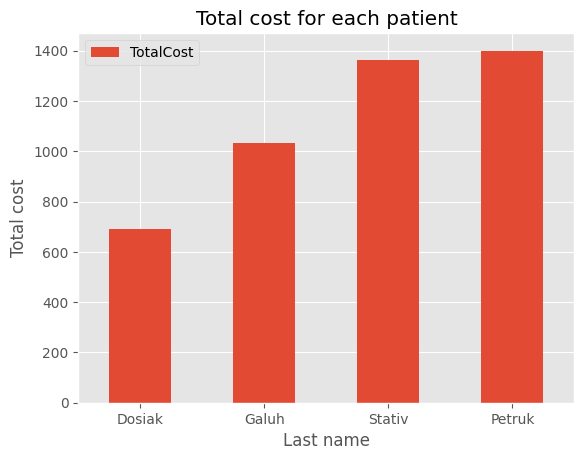

In [13]:
plt.style.use('ggplot')
total_cost.plot('LastNamePatient', 'TotalCost', kind='bar', rot=0, xlabel='Last name', ylabel='Total cost', title='Total cost for each patient')

### Task c:

In [14]:
for_each_medicine = all_df.groupby(['Date', 'NameMedicine'])['Quantity'].sum().reset_index()
for_each_medicine

,Date,NameMedicine,Quantity
0,2024-12-01,Rynaz,2
1,2024-12-02,Tabletochki,1
2,2024-12-03,Syrop,3
3,2024-12-04,Strepsils,2
4,2024-12-04,Syrop,4


In [15]:
start_date = widgets.DatePicker(
    description = 'Pick start date',
    value = for_each_medicine['Date'].min()
)

end_date = widgets.DatePicker(
    description = 'Pick end date',
    value = for_each_medicine['Date'].max()
)

In [16]:
def everyday_vid_medicine(start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    filt = (for_each_medicine['Date'] >= start_date) & (for_each_medicine['Date'] <= end_date)
    
    filtered_df = for_each_medicine[filt]

    filtered_df = pd.concat([filtered_df['NameMedicine'], filtered_df['Quantity']], axis=1)
    filtered_df.set_index('NameMedicine', inplace=True)

    display(filtered_df)

In [17]:
w = widgets.interactive(everyday_vid_medicine, start_date=start_date, end_date=end_date)
display(w)

interactive(children=(DatePicker(value=Timestamp('2024-12-01 00:00:00'), description='Pick start date', step=1…